In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
%matplotlib inline



/var/folders/rg/mf83ftys741dhlw4543fcfhr0000gn/T/ipykernel_11731/1791900740.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
exams = pd.read_csv("exams.csv").loc[9:14]


In [52]:
qt_keys = pd.read_csv("q_type_keys.csv")
# os_keys = pd.read_csv("os_topic_keys.csv")

In [44]:
exams.iat[4,1] = 79+150+60+32

In [45]:
exams

,exam,total_points
9,18-spring-final,79
10,18-spring-mid,150
11,21-fall-final,60
12,21-fall-mid,32
13,overall,321


In [5]:
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    print(curr_exam)
#     print(curr_exam)
#     curr_exam = curr_exam[[curr_exam.columns.tolist()[0],curr_exam.columns.tolist()[2],curr_exam.columns.tolist()[7]]]# +curr_exam[curr_exam.columns.tolist()[2]]+curr_exam[curr_exam.columns.tolist()[7]]
#     curr_exam.columns = ['question_type','gpt3.5_pts_earned', 'bard_pts_earned', 'gpt4_pts_earned']
#     print(curr_exam)
    curr_exam.to_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv', index = False)

08-fall-mid
  question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  gpt4_pts_earned
0            cm        m                 10              6.5               25
1             m        p                  6              4.0               13
2            md        m                 13             12.0               20
3            ds        f                  8              6.0                4


ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [ ]:
#cols: gpt3.5_overall, gpt3.5_math, etc..

In [18]:
qt_keys

,character,category
0,c,Code
1,d,Drawing/Chart
2,m,Math
3,q,Multiple Choice


In [53]:
#gpt performance
columns = qt_keys['category'].tolist()
columns.append('overall')


In [54]:
columns

['Code', 'Drawing/Chart', 'Math', 'Conceptual', 'overall']

In [55]:
exams

,exam,total_points
9,18-spring-final,79
10,18-spring-mid,150
11,21-fall-final,60
12,21-fall-mid,32
13,overall,321


In [7]:
llms = ['gpt3.5', 'bard', 'gpt4', 'gemini', 'claude', 'bing', 'llama']

In [60]:
for llm in llms:
    make_q_type(llm)

Code
Drawing/Chart
Math
Conceptual
overall
[0.6916435093290988, 0.6795574175529058, 0.5474171323080981, 0.6207754689063101, 0.5981308411214953]
       Code  Drawing/Chart      Math  Conceptual   overall             exam
0  0.818182       0.482759  0.407407    0.571429  0.518987  18-spring-final
1  0.625000       1.000000  0.675000    0.625000  0.633333    18-spring-mid
2       NaN       0.500000  0.400000    0.769231  0.666667    21-fall-final
3       NaN       0.000000  0.571429    0.444444  0.500000      21-fall-mid
4  0.691644       0.679557  0.547417    0.620775  0.598131          overall
Code
Drawing/Chart
Math
Conceptual
overall
[0.6425168717745137, 0.6421742399828123, 0.4866859516392227, 0.5946038212393353, 0.5358255451713395]
       Code  Drawing/Chart      Math  Conceptual   overall             exam
0  0.818182       0.482759  0.333333    0.428571  0.455696  18-spring-final
1  0.550000       1.000000  0.725000    0.675000  0.613333    18-spring-mid
2       NaN       0.300000  

In [58]:
all_percentages = []

In [59]:
def make_q_type(llm):
    df = pd.DataFrame(columns = columns)
    for i in range(len(exams.index[:-1])):
    #     print(exams.iat[i,0])
        curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}_combined.csv')
        
        curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
        # print(curr_exam)
        l = []
            
        for key in qt_keys['character'].tolist():
            tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
            
            for j in range(len(curr_exam.index)):
                if key in curr_exam.loc[j]['question_type']:
                    
                    tmp.loc[len(tmp.index)] = curr_exam.loc[j]
            
            if tmp.shape[0] ==0:
                l.append(None)
                continue
            
            tot = 0
            
            for j in tmp.index.tolist():
                tot += tmp.loc[j][f'{llm}_pts_earned']
            
            l.append(tot/len(tmp.index))
            # print(tmp)
        l.append(curr_exam[f'{llm}_pts_earned'].sum()/exams.iat[i,1])
        
        df.loc[len(df.index)] = l
            
    l = []
    for col in df.columns:
        print(col)
        curr_topic = 0
        denom = 0
        for i in range(len(df.index)):
            if not np.isnan(df[col][i]):
                curr_topic += df[col][i]*exams.iat[i,1]
                denom+=exams.iat[i,1]
            
        l.append(curr_topic/denom)
            
    print(l)
        
    
    df.loc[len(df.index)] = l
    df['exam'] = exams['exam'].tolist()
    # df = df.set_index('exam')
    print(df) 
    df.to_csv(f'{llm}_q_type_new.csv', index = False)
    all_percentages.append(df['overall'].tolist())
    

In [61]:
all_percentages

[[0.5189873417721519,
  0.6333333333333333,
  0.6666666666666666,
  0.5,
  0.5981308411214953],
 [0.45569620253164556,
  0.6133333333333333,
  0.5333333333333333,
  0.375,
  0.5358255451713395],
 [0.6075949367088608, 0.76, 0.6666666666666666, 0.59375, 0.6884735202492211],
 [0.6455696202531646, 0.74, 0.7166666666666667, 0.40625, 0.6791277258566978],
 [0.6329113924050633, 0.64, 0.6666666666666666, 0.53125, 0.632398753894081],
 [0.569620253164557, 0.8133333333333334, 0.75, 0.59375, 0.719626168224299],
 [0.5063291139240507, 0.7, 0.4166666666666667, 0.375, 0.5669781931464174]]

In [62]:
overall_df = pd.DataFrame(all_percentages, llms,exams['exam'].tolist())

In [63]:
overall_df.transpose()

,gpt3.5,bard,gpt4,gemini,claude,bing,llama
18-spring-final,0.518987,0.455696,0.607595,0.645570,0.632911,0.569620,0.506329
18-spring-mid,0.633333,0.613333,0.760000,0.740000,0.640000,0.813333,0.700000
21-fall-final,0.666667,0.533333,0.666667,0.716667,0.666667,0.750000,0.416667
21-fall-mid,0.500000,0.375000,0.593750,0.406250,0.531250,0.593750,0.375000
overall,0.598131,0.535826,0.688474,0.679128,0.632399,0.719626,0.566978


In [53]:
gpt35_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    #put the characters in lists
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
    print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist()[:-2]:
        print(key)
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        #total points for that question type
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt3.5_pts_earned']
        
        l.append(tot/len(tmp.index))
    l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
    
    print(l)
    gpt35_df.loc[len(gpt35_df.index)] = l
#         print(tmp)
l = []
for col in gpt35_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt35_df.index)):
        if not np.isnan(gpt35_df[col][i]):
            curr_topic += gpt35_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
print(l)
    
gpt35_df.loc[len(gpt35_df.index)] = l

18-spring-final
   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0            [q]       fm                  1                0   
1            [q]       fm                  1                0   
2            [q]       fm                  0                0   
3         [m, q]       fm                  0                0   
4         [m, q]       fm                  1                0   
..           ...      ...                ...              ...   
74     [q, d, m]        m                  1                1   
75           [q]        m                  0                0   
76           [q]        m                  1                0   
77           [q]        m                  1                0   
78           [q]        m                  0                1   

    gpt4_pts_earned  gemini_pts_earned  
0                 1                  1  
1                 0                  0  
2                 0                  0  
3                 0                  0 

In [54]:
gpt35_df

,Code,Drawing/Chart,Math,overall
0,0.818182,0.482759,0.407407,0.518987
1,0.625000,1.000000,0.675000,0.633333
2,NaN,0.500000,0.400000,0.666667
3,NaN,0.000000,0.571429,0.500000
4,0.691644,0.679557,0.547417,0.598131


In [57]:
bard_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist()[:-2]:
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += int(tmp.loc[j]['bard_pts_earned']) if not np.isnan(tmp.loc[j]['bard_pts_earned']) else 0
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['bard_pts_earned'].sum()/exams.iat[i,1])
    
    bard_df.loc[len(bard_df.index)] = l
l = []
for col in bard_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(bard_df[col][i]):
            curr_topic += bard_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
bard_df.loc[len(bard_df.index)] = l

18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [58]:
bard_df


,Code,Drawing/Chart,Math,overall
0,0.818182,0.482759,0.333333,0.455696
1,0.550000,1.000000,0.725000,0.613333
2,NaN,0.300000,0.200000,0.533333
3,NaN,0.000000,0.285714,0.375000
4,0.642517,0.642174,0.486686,0.535826


In [59]:
gpt4_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist()[:-2]:
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += int(tmp.loc[j]['gpt4_pts_earned']) if not np.isnan(tmp.loc[j]['gpt4_pts_earned']) else 0
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt4_pts_earned'].sum()/exams.iat[i,1])
    
    gpt4_df.loc[len(gpt4_df.index)] = l
l = []
for col in gpt4_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt4_df.index)):
        if not np.isnan(gpt4_df[col][i]):
            curr_topic += gpt4_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt4_df.loc[len(gpt4_df.index)] = l
    

18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [60]:
gpt4_df

,Code,Drawing/Chart,Math,overall
0,0.727273,0.655172,0.592593,0.607595
1,0.700000,1.000000,0.775000,0.760000
2,NaN,0.400000,0.466667,0.666667
3,NaN,1.000000,0.357143,0.593750
4,0.709408,0.802986,0.630821,0.688474


In [62]:
gem_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
#     print(curr_exam)
    l = []

    for key in qt_keys['character'].tolist()[:-2]:
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['question_type']:
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += int(tmp.loc[j]['gemini_pts_earned']) if not np.isnan(tmp.loc[j]['gemini_pts_earned']) else 0
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gemini_pts_earned'].sum()/exams.iat[i,1])
    
    gem_df.loc[len(gem_df.index)] = l
l = []
for col in gem_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gem_df.index)):
        if not np.isnan(gem_df[col][i]):
            curr_topic += gem_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gem_df.loc[len(gem_df.index)] = l
    

18-spring-final
18-spring-mid
21-fall-final
21-fall-mid


In [70]:
gem_df

,Code,Drawing/Chart,Math,overall
0,0.727273,0.620690,0.518519,0.658228
1,0.750000,0.800000,0.675000,0.740000
2,NaN,0.500000,0.400000,0.716667
3,NaN,0.000000,0.214286,0.406250
4,0.742160,0.620045,0.539159,0.682243


In [64]:
gpt35_df.to_csv('gpt35_qtype.csv', index = False)
bard_df.to_csv('bard_qtype.csv', index = False)
gpt4_df.to_csv('gpt4_qtype.csv', index = False)
gem_df.to_csv('gemini_qtype.csv', index = False)

In [4]:
gpt35_df = pd.read_csv('gpt35_qtype.csv')
bard_df = pd.read_csv('bard_qtype.csv')
gpt4_df = pd.read_csv('gpt4_qtype.csv')
gem_df = pd.read_csv('gemini_qtype.csv')

In [67]:
gpt35_df

,Code,Drawing/Chart,Math,overall
0,0.818182,0.482759,0.407407,0.518987
1,0.625000,1.000000,0.675000,0.633333
2,NaN,0.500000,0.400000,0.666667
3,NaN,0.000000,0.571429,0.500000
4,0.691644,0.679557,0.547417,0.598131


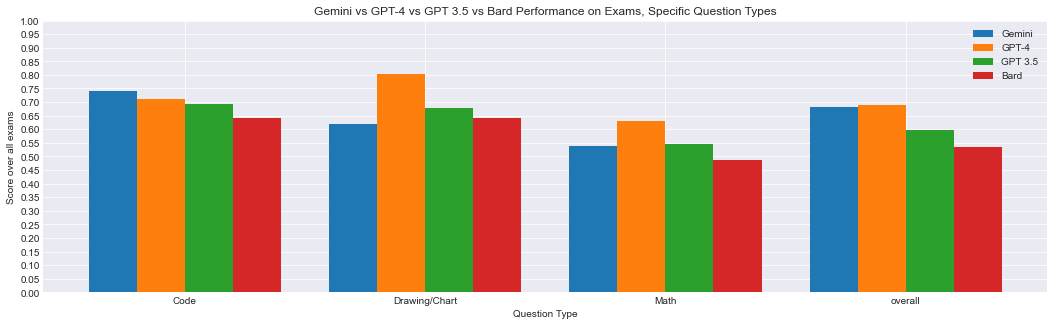

In [68]:
xax = np.arange(len(bard_df.loc[3].tolist()))
gpt = gpt35_df.loc[4]
b = bard_df.loc[4]
g4 = gpt4_df.loc[4]
gem = gem_df.loc[4]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax-0.3, gem, 0.2, label = 'Gemini')
plt.bar(xax-0.1, g4, 0.2, label = 'GPT-4')
plt.bar(xax+0.1, gpt, 0.2, label = 'GPT 3.5')
plt.bar(xax + 0.3, b, 0.2, label = 'Bard')

plt.xticks(xax, bard_df.columns)
plt.yticks(np.arange(0,1.05,0.05))
plt.xlabel("Question Type")
plt.ylabel("Score over all exams")
plt.title("Gemini vs GPT-4 vs GPT 3.5 vs Bard Performance on Exams, Specific Question Types")

plt.legend()
plt.savefig('qtype_overall.png')
plt.show()

[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]


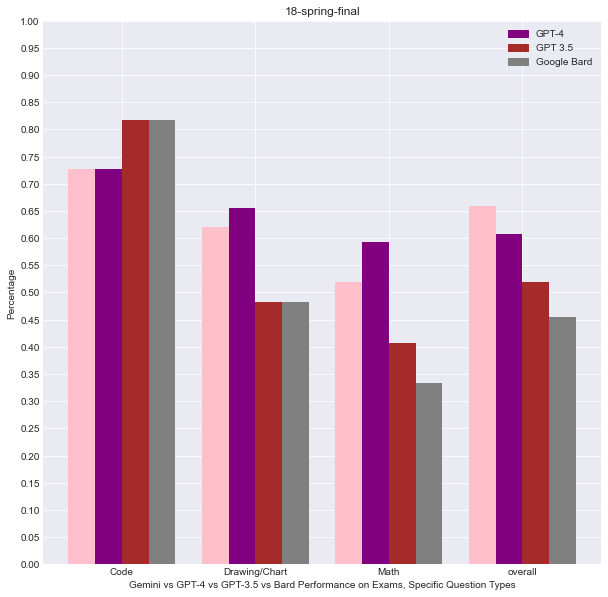

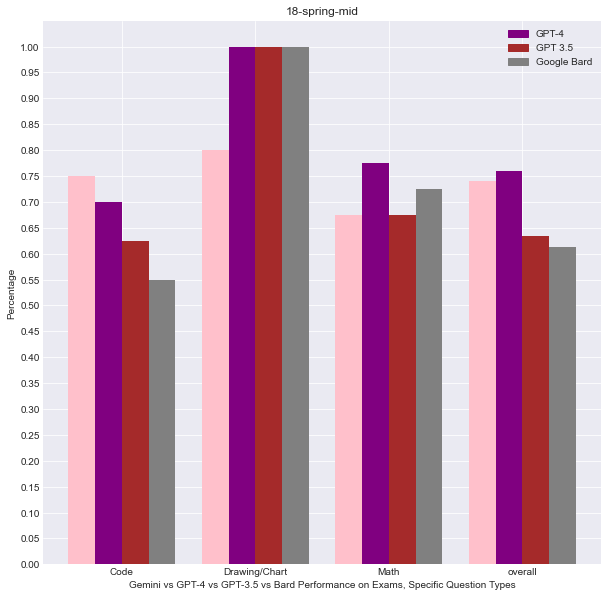

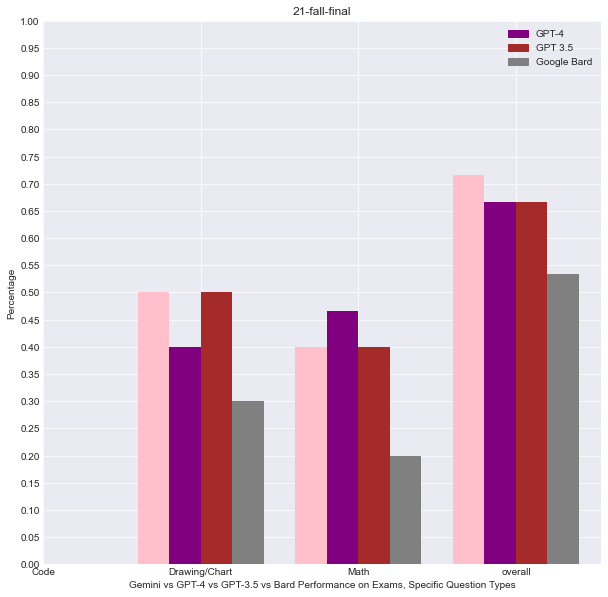

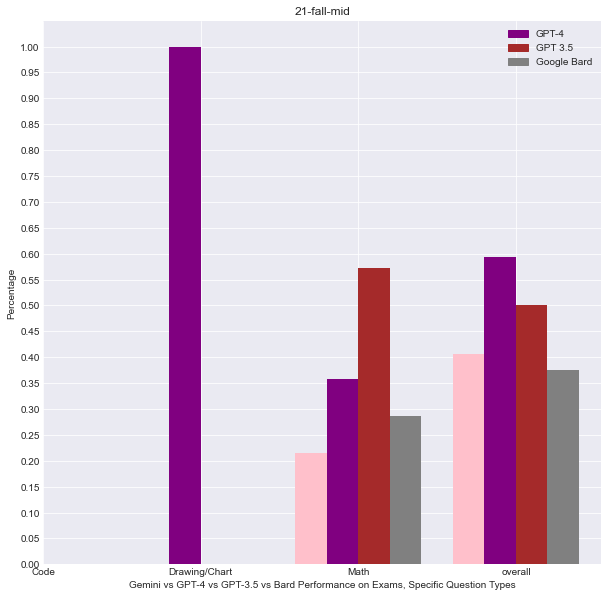

In [71]:
#graph
for i in range(4):
#     ax = axs[i]
#     matplotlib.style.use("tomato")
    fig, ax = plt.subplots(1,1)
    
    xax = np.arange(len(bard_df.loc[i]))#[~np.isnan(bard_df.loc[i])].tolist()))
    print(xax)
    gpt = gpt35_df.loc[i]
    b = bard_df.loc[i]
    g4 = gpt4_df.loc[i]
    gem = gem_df.loc[i]
    ax.figure.set_size_inches(10, 10)
#     ax.figure(figsize=(18, 5))
#     ax.style.use('seaborn-darkgrid')
    plt.bar(xax-0.3, gem, 0.2, label = 'Gemini', color = "pink")
    plt.bar(xax-0.1, g4, 0.2, label = 'GPT-4', color = "purple")
    ax.bar(xax+0.1, gpt, 0.2, label = 'GPT 3.5', color = "brown")
    ax.bar(xax + 0.3, b, 0.2, label = 'Bard', color = "grey")
    
#     print(bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist())

    ax.set_xticks(xax, bard_df.loc[i].index.tolist())
    ax.set_xlabel("Gemini vs GPT-4 vs GPT-3.5 vs Bard Performance on Exams, Specific Question Types")
    plt.yticks(np.arange(0,1.05,0.05))
    ax.set_ylabel("Percentage")    
    ax.set_title(exams.iat[i,0])
    ax.legend(handles = [mpatches.Patch(color='purple', label='GPT-4'),mpatches.Patch(color='brown', label='GPT 3.5'),mpatches.Patch(color='grey', label='Google Bard')])

        
    fig.savefig(exams.iat[i,0]+'.png')
    
    
    